# __Housing Market Prices Data Analysis__

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


# import seaborn as sns
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

df = pd.read_csv('zillowcleanedup.csv')


#### __Selling Price vs Home Square Footage for Neighborhoods 30310, 30309 and 94043__

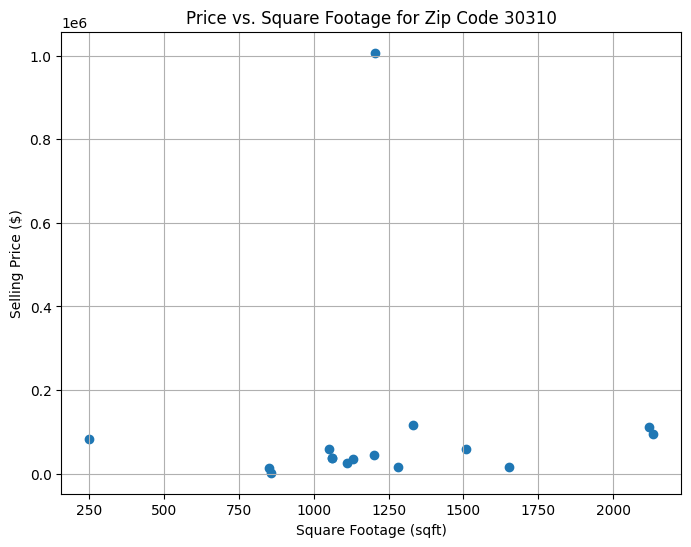

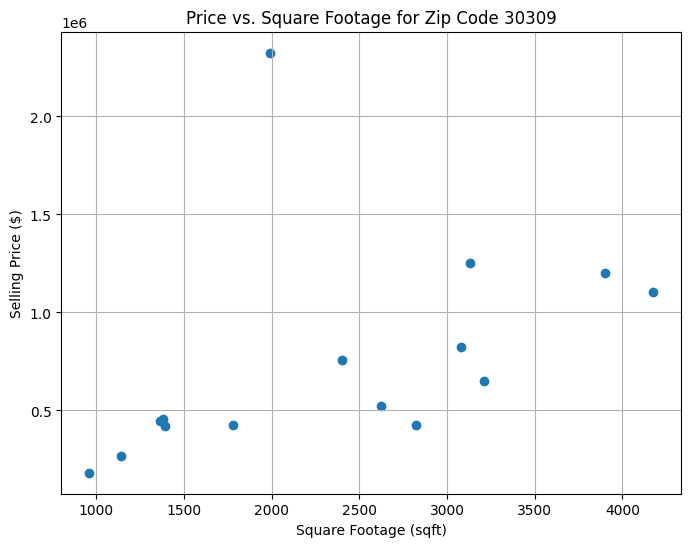

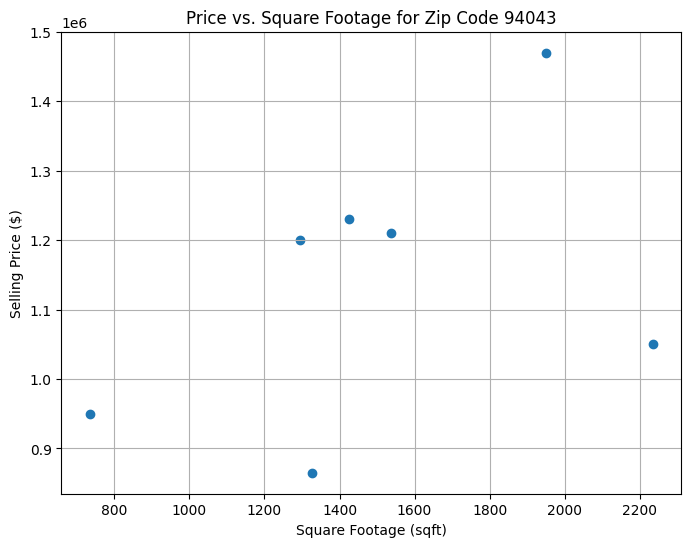

In [26]:
# single_family_data = df[df['House type'] == 'single family']
single_family_data = df[df['House type'].str.strip() == 'single family']

def plot_price_vs_sqft(data, zip_code):
    subset = data[data['Zip code'] == zip_code]
    # print(f"Data for Zip Code {zip_code}:\n", subset)
    plt.figure(figsize=(8, 6))
    plt.scatter(subset['sqft'], subset['Selling price'], alpha=1)
    plt.title(f'Price vs. Square Footage for Zip Code {zip_code}')
    plt.xlabel('Square Footage (sqft)')
    plt.ylabel('Selling Price ($)')
    plt.grid(True)
    plt.show()

# Generate plots for each zip code
for zip_code in [30310, 30309, 94043]:
    plot_price_vs_sqft(single_family_data, zip_code)

#### __Linear Regression using Least Squares on Selling Price vs Home Square Footage for Neighborhoods 30310, 30309 and 94043__

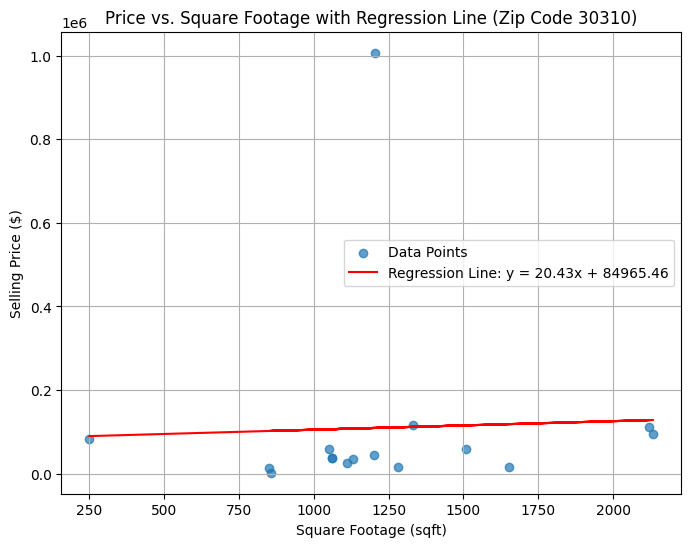

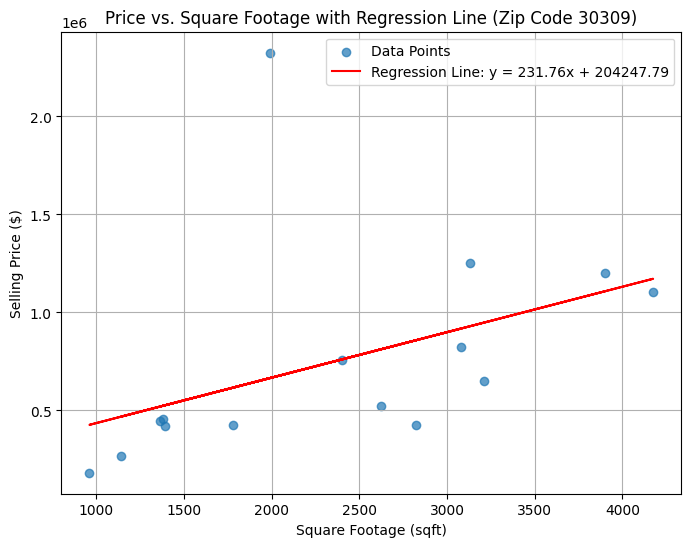

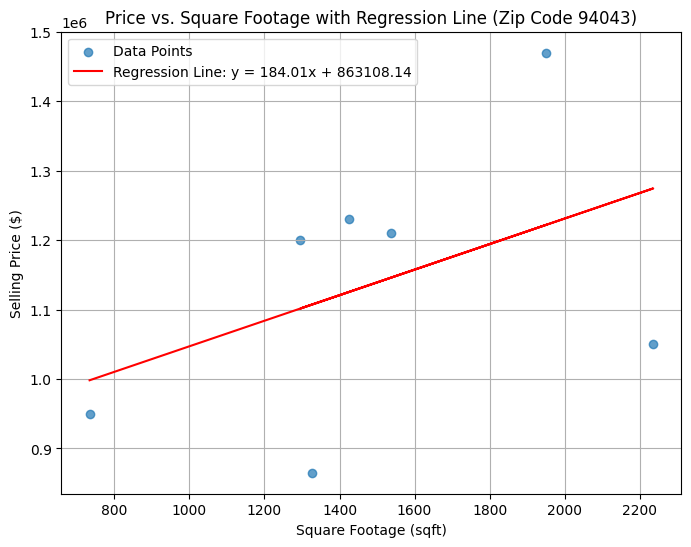

In [27]:
def plot_with_regression(data, zip_code):
    subset = data[data['Zip code'] == zip_code]
    if subset.empty:
        print(f"No data available for zip code {zip_code}.")
        return
    
    sqft = subset['sqft'].values
    price = subset['Selling price'].values
    
    # Perform least squares regression using β=(X^T*X)^-1*X^T*y
    X = np.vstack([sqft, np.ones(len(sqft))]).T  # Creates the matrix X in (y-X*β)^2
    m, c = np.linalg.lstsq(X, price)[0]  # Solve for slope β1 and intercept α
    
    plt.figure(figsize=(8, 6))
    plt.scatter(sqft, price, label='Data Points', alpha=0.7)
    plt.plot(sqft, m * sqft + c, 'r', label=f'Regression Line: y = {m:.2f}x + {c:.2f}')
    plt.title(f'Price vs. Square Footage with Regression Line (Zip Code {zip_code})')
    plt.xlabel('Square Footage (sqft)')
    plt.ylabel('Selling Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

for zip_code in [30310, 30309, 94043]:
    plot_with_regression(single_family_data, zip_code)

#### __Linear Regression using Stats Models Package on Selling Price vs Home Square Footage for Neighborhoods 30310, 30309 and 94043__

__Model 1: With Bathrooms__

In [28]:
single_family_data = df[df['House type'].str.strip() == 'single family']
single_family_data = single_family_data.rename(columns=
                                               {'Selling price': 'selling_price',
                                                'Zip code': 'zip_code'})
# print(single_family_data.head())


model = smf.ols(formula='selling_price ~ sqft + C(zip_code) + beds + bath', data=single_family_data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     9.606
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           1.13e-05
Time:                        14:43:44   Log-Likelihood:                -538.66
No. Observations:                  38   AIC:                             1089.
Df Residuals:                      32   BIC:                             1099.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.639e+05 

__Model 1 Results__

The number of bathrooms does not have a statistically significant effect on the selling price of a house in this model. When examining the p-value for the bath coefficient, it is 0.949, which is much greater than the 5% significance level. 

__Model 2: No Bathrooms__

In [29]:
model = smf.ols(formula='selling_price ~ sqft + C(zip_code) + beds', data=single_family_data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     12.38
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           2.95e-06
Time:                        14:43:44   Log-Likelihood:                -538.67
No. Observations:                  38   AIC:                             1087.
Df Residuals:                      33   BIC:                             1096.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.645e+05 

__Conclusion__

Comparing the two models, the inclusion of the number of bathrooms does not improve the predictive power of the model. The R-squared values are virtually the same for with bath vs without (0.538 vs 0.552). The AIC and BIC values are both lower for Model 2, showing improvement without having the number of bathrooms as a predictor. Therefore, Model 2 is the ideal model as it offers improved performance with greater simplicity. 

Furthermore, for both models, the intercept cannot be proven to be non-zero. The p-values are 0.288 and 0.280 for Model 1 and Model 2, respectively. Both values are higher than the 5% significance level, so the null hypothesis cannot be rejected. 